In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [218]:
#cargamos dfs usando pandas
train_df = pd.read_csv('hospitalizaciones_train.csv',delimiter = ',',encoding = "utf-8")
test_df = pd.read_csv('hospitalizaciones_test.csv',delimiter = ',',encoding = "utf-8")

In [219]:
#visualizamos df
train_df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [220]:
#visualizamos df
train_df.sample(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
272125,3,gynecology,B,Dr Sophia,10,42020,21-30,Female,Trauma,Extreme,Diabetes,3,No,4483.193423,9
124349,4,gynecology,F,Dr Olivia,4,113668,41-50,Female,Trauma,Moderate,None,6,Yes,3771.821890,9
392122,2,gynecology,B,Dr Olivia,10,7920,21-30,Female,Trauma,Moderate,Other,2,Yes,4442.966799,10
98837,4,gynecology,D,Dr Olivia,2,85683,41-50,Female,Emergency,Moderate,None,2,Yes,3912.576543,9
145317,2,gynecology,D,Dr Olivia,10,86272,21-30,Female,Emergency,Moderate,Other,4,Yes,4682.572839,8


In [221]:
#visualizamos df
train_df.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


In [222]:
#visualizamos df
train_df.dtypes

Available Extra Rooms in Hospital      int64
Department                            object
Ward_Facility_Code                    object
doctor_name                           object
staff_available                        int64
patientid                              int64
Age                                   object
gender                                object
Type of Admission                     object
Severity of Illness                   object
health_conditions                     object
Visitors with Patient                  int64
Insurance                             object
Admission_Deposit                    float64
Stay (in days)                         int64
dtype: object

In [223]:
#chequeamos nulos
train_df.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [224]:
#visualizamos df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [225]:
#creamos lista con columna seleccionada
list1 = train_df['Stay (in days)']


In [226]:
#creamos lista nueva vacia y la llenamos con valores correspondientes a la columna "stay (in days)"
list2 = []
for i in list1:
    if i <= 8:
        list2.append('0')
    else:
        list2.append('1')  

In [227]:
#agregamos la nueva lista binaria al df
train_df['stay'] = list2

In [228]:
train_df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),stay
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,1


In [229]:
#dropeamos columnas que consideramos innecesarias para el analisis
train_df.drop(columns=['Stay (in days)', 'patientid', 'Visitors with Patient', 'Ward_Facility_Code'], inplace=True)

In [230]:
train_df.head()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,stay
0,4,gynecology,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,Yes,2966.408696,0
1,4,gynecology,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,No,3554.835677,1
2,2,gynecology,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,Yes,5624.733654,0
3,4,gynecology,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,No,4814.149231,0
4,2,anesthesia,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,No,5169.269637,1


In [231]:
from sklearn import preprocessing

In [232]:
#transformamos datos en valores numericos para poder operar dentro del modelo 
le = preprocessing.LabelEncoder()
train_df['Insurance'] = le.fit_transform(train_df['Insurance'])
train_df['health_conditions'] = le.fit_transform(train_df['health_conditions'])
train_df['Severity of Illness'] = le.fit_transform(train_df['Severity of Illness'])
train_df['Type of Admission'] = le.fit_transform(train_df['Type of Admission'])
train_df['gender'] = le.fit_transform(train_df['gender'])
train_df['Age'] = le.fit_transform(train_df['Age'])
train_df['doctor_name'] = le.fit_transform(train_df['doctor_name'])
train_df['Department'] = le.fit_transform(train_df['Department'])

In [233]:
train_df.head()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,stay
0,4,2,8,0,4,0,1,0,1,1,2966.408696,0
1,4,2,8,2,3,0,1,1,2,0,3554.835677,1
2,2,2,8,8,2,0,1,0,1,1,5624.733654,0
3,4,2,4,7,3,0,2,2,4,0,4814.149231,0
4,2,1,2,10,7,1,1,2,1,0,5169.269637,1


In [234]:
#visualizamos correlacion de nuestro df
train_df.corr()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit
Available Extra Rooms in Hospital,1.000000,-0.021235,0.015253,-0.003064,-0.029921,-0.038214,0.020866,0.024045,0.001643,0.002438,-0.050775
Department,-0.021235,1.000000,0.241001,0.016304,0.013096,0.016474,-0.037395,0.014698,-0.000344,-0.000714,-0.009166
doctor_name,0.015253,0.241001,1.000000,-0.001162,-0.308142,-0.420330,-0.035731,-0.003980,-0.475721,-0.003544,-0.023484
staff_available,-0.003064,0.016304,-0.001162,1.000000,0.001818,0.003960,-0.002255,0.002759,-0.001500,0.001245,0.000816
Age,-0.029921,0.013096,-0.308142,0.001818,1.000000,0.497530,0.005304,0.023350,0.037140,-0.002472,0.016743
gender,-0.038214,0.016474,-0.420330,0.003960,0.497530,1.000000,0.031566,0.029147,-0.000242,0.001657,0.038189
Type of Admission,0.020866,-0.037395,-0.035731,-0.002255,0.005304,0.031566,1.000000,-0.070795,0.001768,-0.002062,0.016885
Severity of Illness,0.024045,0.014698,-0.003980,0.002759,0.023350,0.029147,-0.070795,1.000000,0.214291,0.001924,0.005637
health_conditions,0.001643,-0.000344,-0.475721,-0.001500,0.037140,-0.000242,0.001768,0.214291,1.000000,0.008702,0.000412
Insurance,0.002438,-0.000714,-0.003544,0.001245,-0.002472,0.001657,-0.002062,0.001924,0.008702,1.000000,0.001164


In [235]:
train_df.head()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,stay
0,4,2,8,0,4,0,1,0,1,1,2966.408696,0
1,4,2,8,2,3,0,1,1,2,0,3554.835677,1
2,2,2,8,8,2,0,1,0,1,1,5624.733654,0
3,4,2,4,7,3,0,2,2,4,0,4814.149231,0
4,2,1,2,10,7,1,1,2,1,0,5169.269637,1


In [236]:
#declaramos x e y dejando en la segunda variable nuestra columna creada 'stay'
X = train_df.iloc[:,0:11]
y = train_df.iloc[:,-1]

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
#splitear los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [239]:
from sklearn.linear_model import LogisticRegression

In [240]:
#algoritmo de refresion logistica
logreg = LogisticRegression(max_iter = len(X_train))
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [241]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [242]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

Text(0.5, 1.1, 'Matriz de confusion')

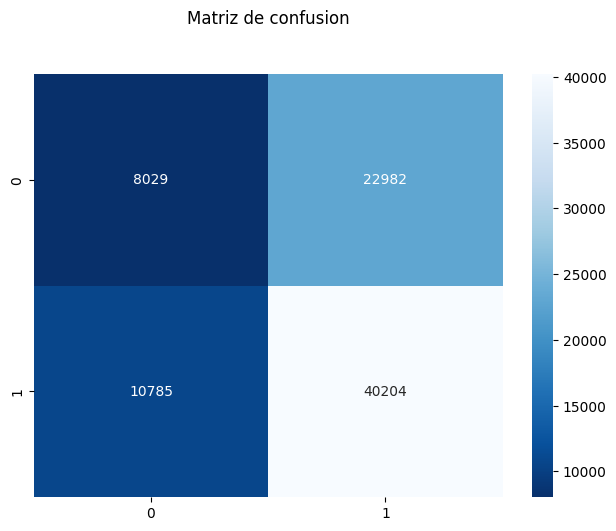

In [243]:
#Creamos df de matriz de confusion para visualizar en un heatmap
class_names = [0,1]
fig,ax = plt.subplots() 
tick_marks = np.arange(len(class_names))  
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y=1.1)

In [244]:
#Calcular accuracy de matriz de confusion
metrics.accuracy_score(y_test,y_pred)

0.5882073170731708

In [245]:
#Calcular recall de matriz de confusion
metrics.recall_score(y_test, y_pred, pos_label='1')

0.7884837906215066

In [247]:
#creamos df nuevo 
pred1 = pd.DataFrame(y_pred)
pred1 = pred1.rename(columns={0:'pred'})

#creamos csv entregable final
pred1.to_csv('ftacc41.csv', index=False)